In [2]:
seed = 1
import random
random.seed(seed)
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

import numpy as np
np.random.seed(seed)

import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(seed)
import torch

import tensorflow_addons as tfa

if len(tf.config.list_physical_devices('GPU')) > 0:
    tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

from covid.models import *
from covid.utils import *
from covid.metrics import *

In [ ]:
torch.cuda.device_count(), torch.cuda.get_device_name(torch.cuda.current_device())

In [ ]:
devices = tf.config.list_physical_devices('GPU')
devices

## Lungs

#### Grayscale images

In [2]:
img_params = {'img_width': 330,
              'img_height': 256,
              'num_channels': 1}

try:
    X_val = np.load('CT-COV-Lungs-Crop/Val/X_val.npy')
    y_val = np.load('CT-COV-Lungs-Crop/Val/y_val.npy')

except:
    files_paths_val, files_labels_val = files_paths_labels('CT-COV-Lungs-Crop/Val', 'Val')
    X_val, y_val = prepare_X_y(files_paths_val, files_labels_val, **img_params)
    X_val, y_val = preprocess_matrices(X_val, y_val)

    np.save('CT-COV-Lungs-Crop/Val/X_val.npy', X_val)
    np.save('CT-COV-Lungs-Crop/Val/y_val.npy', y_val)

F1 SCORE:  0.72521013
                precision    recall  f1-score   support

           COV       0.77      0.87      0.82       908
        Normal       0.66      0.42      0.52       388
OtherPneumonia       0.50      0.82      0.62        45

      accuracy                           0.74      1341
     macro avg       0.65      0.70      0.65      1341
  weighted avg       0.73      0.74      0.73      1341



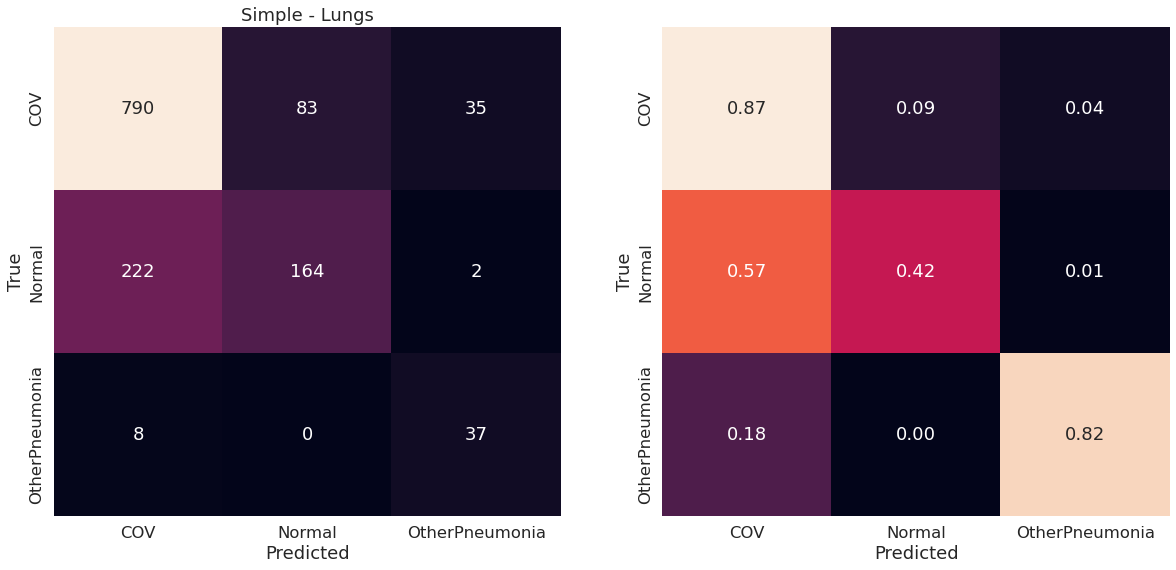

F1 SCORE:  0.6052786
                precision    recall  f1-score   support

           COV       0.76      0.60      0.67       908
        Normal       0.41      0.53      0.46       388
OtherPneumonia       0.32      0.93      0.47        45

      accuracy                           0.59      1341
     macro avg       0.50      0.69      0.54      1341
  weighted avg       0.65      0.59      0.61      1341



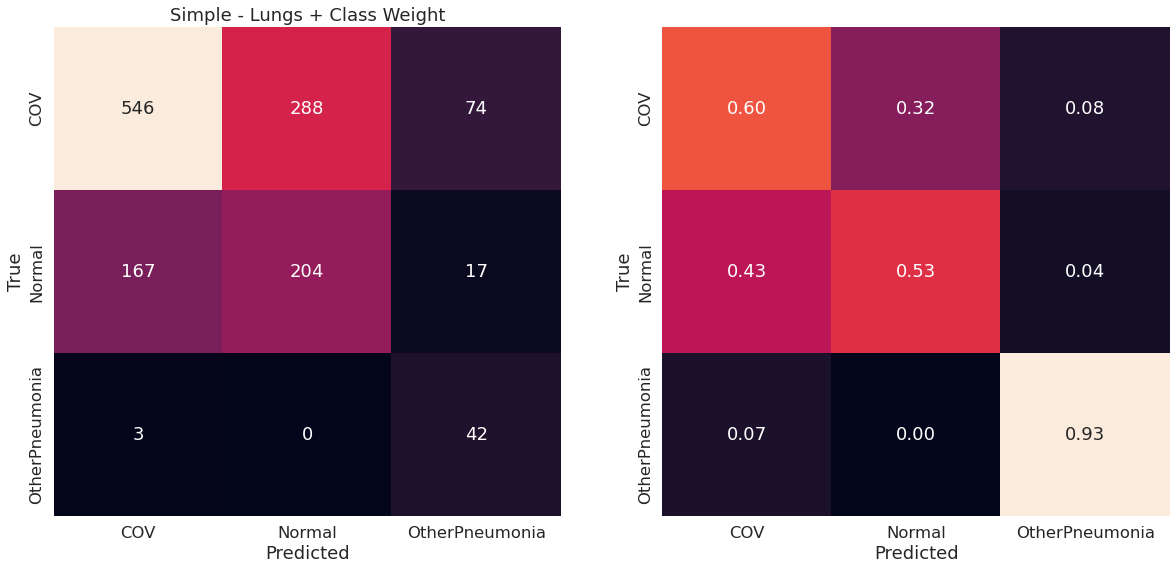

F1 SCORE:  0.66947436
                precision    recall  f1-score   support

           COV       0.75      0.82      0.78       908
        Normal       0.52      0.46      0.49       388
OtherPneumonia       0.00      0.00      0.00        45

      accuracy                           0.69      1341
     macro avg       0.42      0.43      0.42      1341
  weighted avg       0.66      0.69      0.67      1341



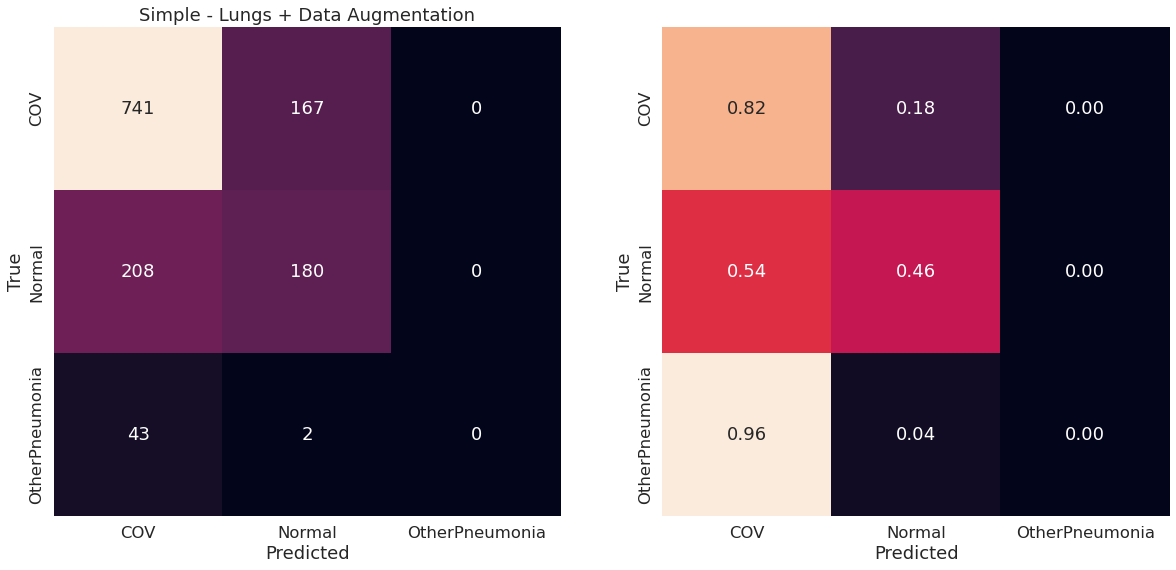

F1 SCORE:  0.68193686
                precision    recall  f1-score   support

           COV       0.76      0.77      0.77       908
        Normal       0.52      0.50      0.51       388
OtherPneumonia       0.43      0.44      0.44        45

      accuracy                           0.68      1341
     macro avg       0.57      0.57      0.57      1341
  weighted avg       0.68      0.68      0.68      1341



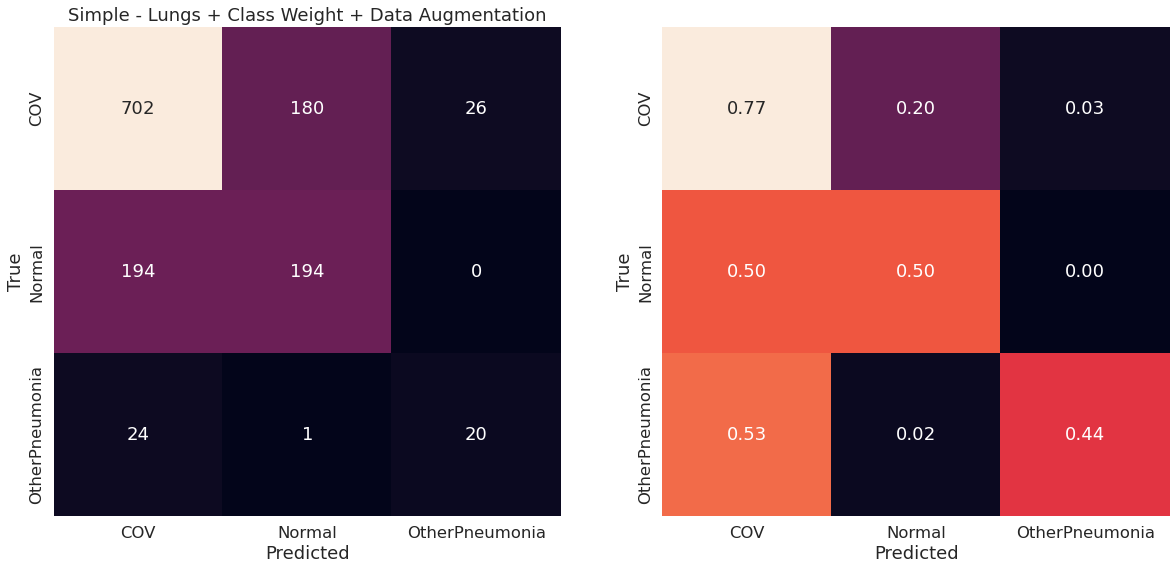

In [5]:
confusion_matrices('Simple', get_model_simple(**img_params), get_model_simple(if_dataaug=True, data_augmentation=dataaug_layer(0.05, -0.1, 0.05, **img_params), **img_params), 'lungs', X_val, y_val, 'Lungs')

F1 SCORE:  0.63803405
                precision    recall  f1-score   support

           COV       0.76      0.84      0.80       908
        Normal       0.73      0.21      0.32       388
OtherPneumonia       0.09      0.44      0.14        45

      accuracy                           0.64      1341
     macro avg       0.53      0.50      0.42      1341
  weighted avg       0.73      0.64      0.64      1341



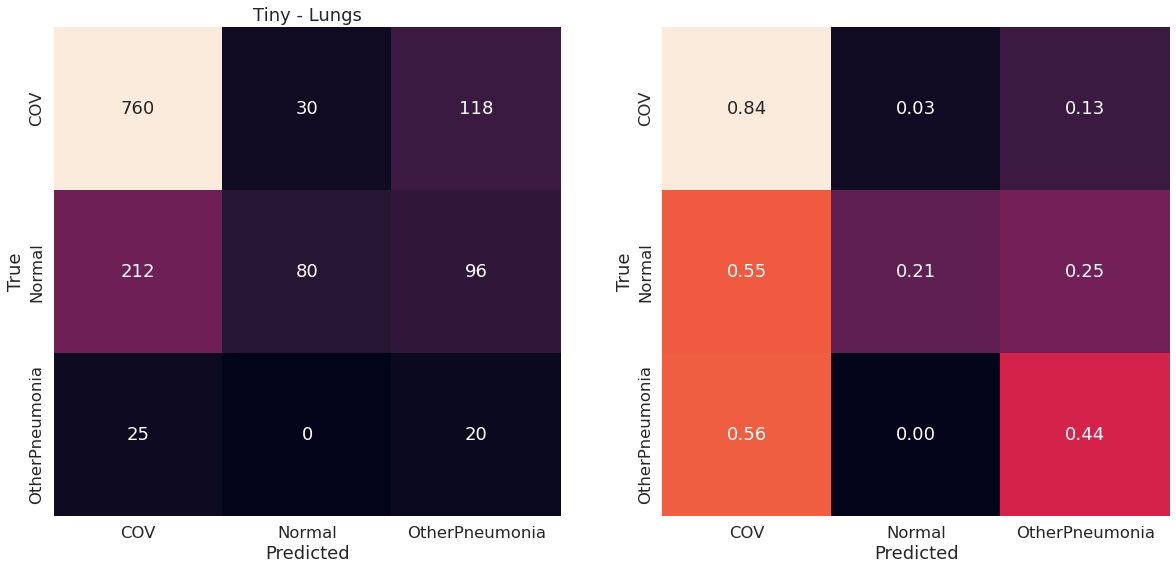

F1 SCORE:  0.76340705
                precision    recall  f1-score   support

           COV       0.84      0.84      0.84       908
        Normal       0.70      0.55      0.62       388
OtherPneumonia       0.34      0.93      0.49        45

      accuracy                           0.76      1341
     macro avg       0.63      0.78      0.65      1341
  weighted avg       0.78      0.76      0.76      1341



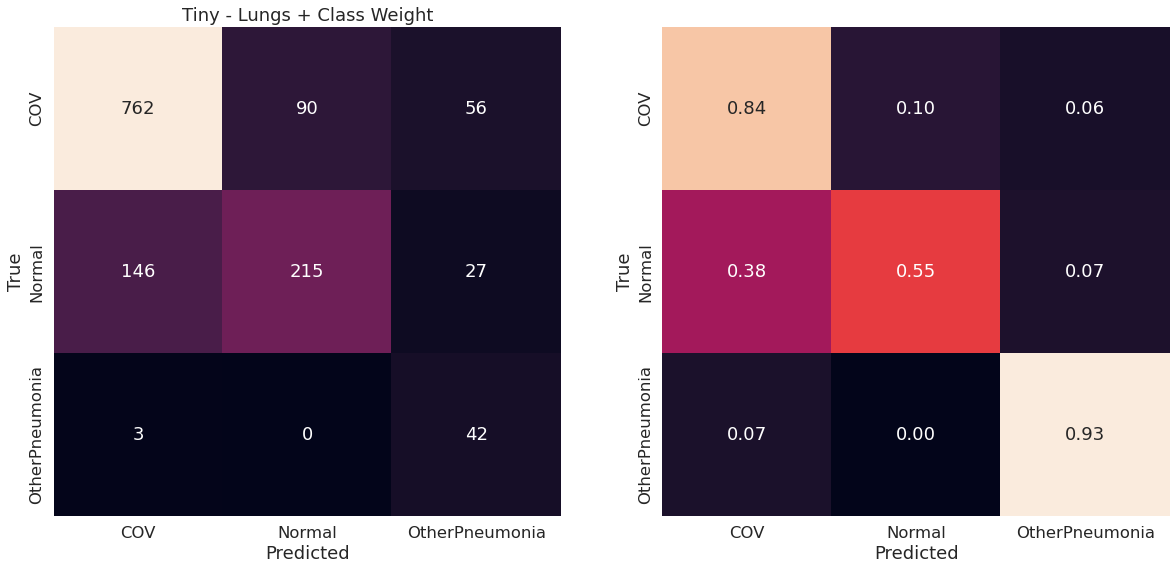

F1 SCORE:  0.5781288
                precision    recall  f1-score   support

           COV       0.95      0.45      0.61       908
        Normal       0.68      0.45      0.54       388
OtherPneumonia       0.07      1.00      0.13        45

      accuracy                           0.47      1341
     macro avg       0.57      0.64      0.43      1341
  weighted avg       0.84      0.47      0.58      1341



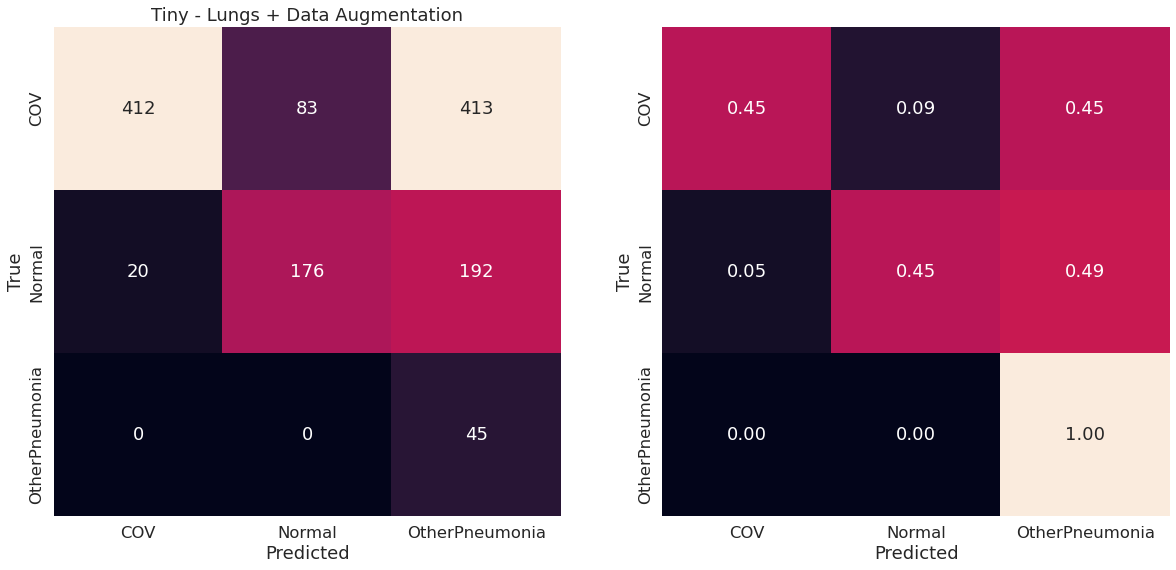

F1 SCORE:  0.567188
                precision    recall  f1-score   support

           COV       0.68      0.92      0.78       908
        Normal       0.32      0.07      0.12       388
OtherPneumonia       0.30      0.07      0.11        45

      accuracy                           0.65      1341
     macro avg       0.43      0.35      0.34      1341
  weighted avg       0.56      0.65      0.57      1341



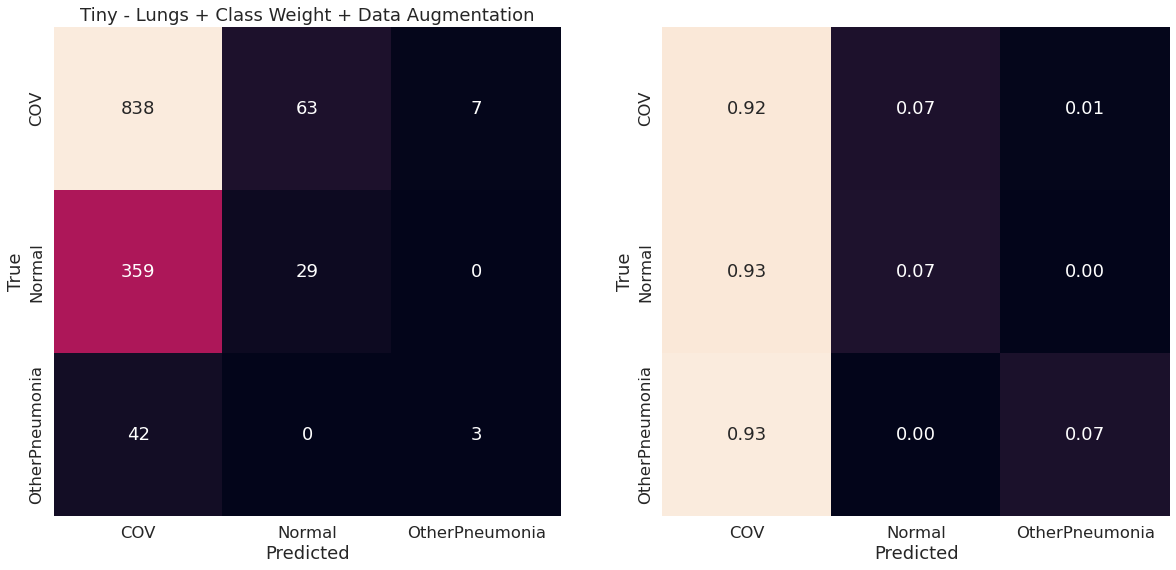

In [10]:
confusion_matrices('Tiny', get_model_tiny(**img_params), get_model_tiny(if_dataaug=True, data_augmentation=dataaug_layer(0.05, -0.1, 0.05, **img_params), **img_params), 'lungs', X_val, y_val, 'Lungs')

F1 SCORE:  0.748132
                precision    recall  f1-score   support

           COV       0.89      0.73      0.80       908
        Normal       0.67      0.67      0.67       388
OtherPneumonia       0.19      0.87      0.31        45

      accuracy                           0.72      1341
     macro avg       0.58      0.76      0.59      1341
  weighted avg       0.81      0.72      0.75      1341



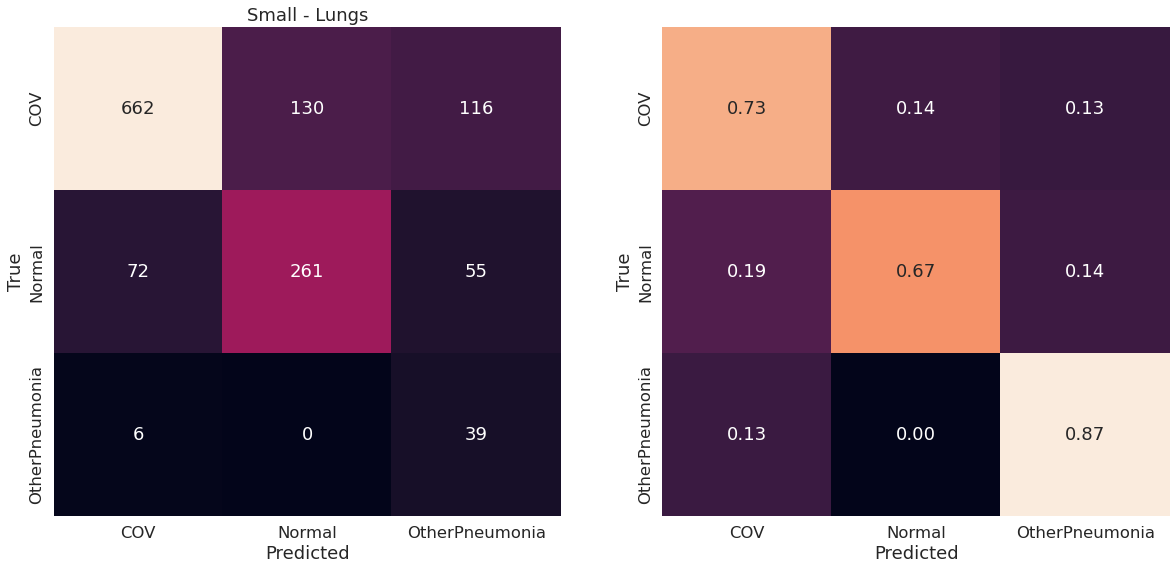

F1 SCORE:  0.751631
                precision    recall  f1-score   support

           COV       0.81      0.83      0.82       908
        Normal       0.61      0.60      0.60       388
OtherPneumonia       0.76      0.56      0.64        45

      accuracy                           0.75      1341
     macro avg       0.73      0.66      0.69      1341
  weighted avg       0.75      0.75      0.75      1341



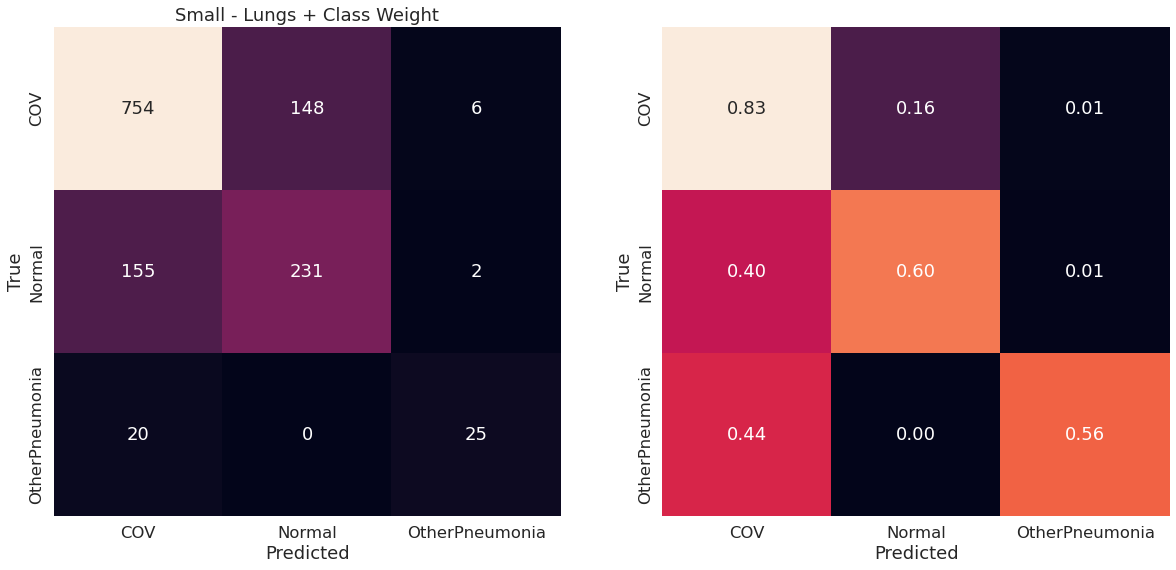

F1 SCORE:  0.591765
                precision    recall  f1-score   support

           COV       0.73      0.80      0.76       908
        Normal       0.51      0.14      0.22       388
OtherPneumonia       0.19      0.96      0.31        45

      accuracy                           0.62      1341
     macro avg       0.47      0.63      0.43      1341
  weighted avg       0.65      0.62      0.59      1341



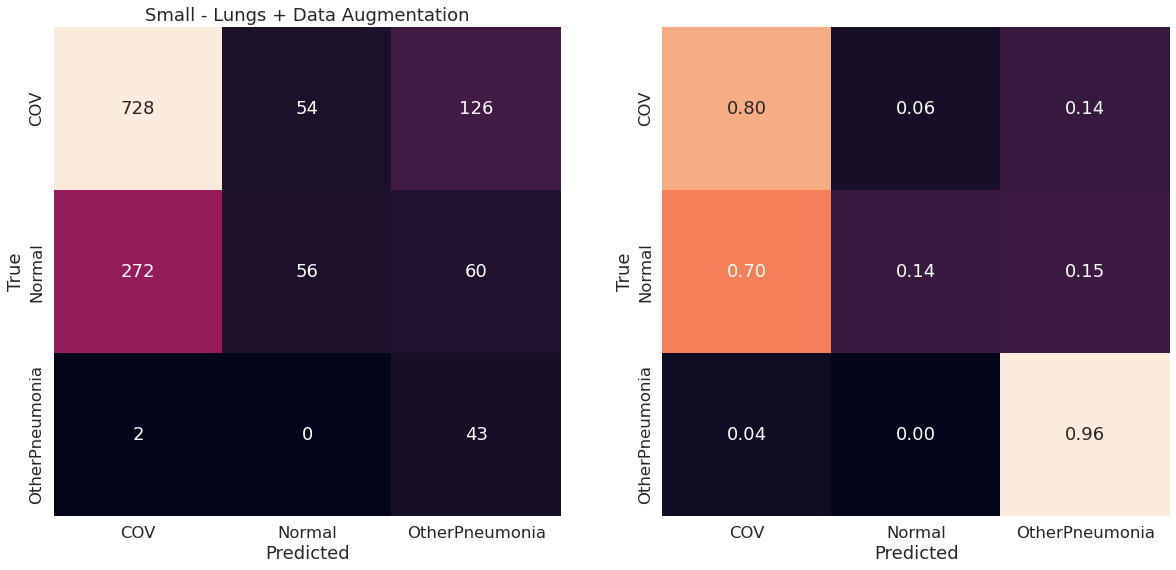

F1 SCORE:  0.5537257
                precision    recall  f1-score   support

           COV       0.69      0.96      0.80       908
        Normal       0.00      0.00      0.00       388
OtherPneumonia       0.23      0.42      0.30        45

      accuracy                           0.66      1341
     macro avg       0.31      0.46      0.37      1341
  weighted avg       0.48      0.66      0.55      1341



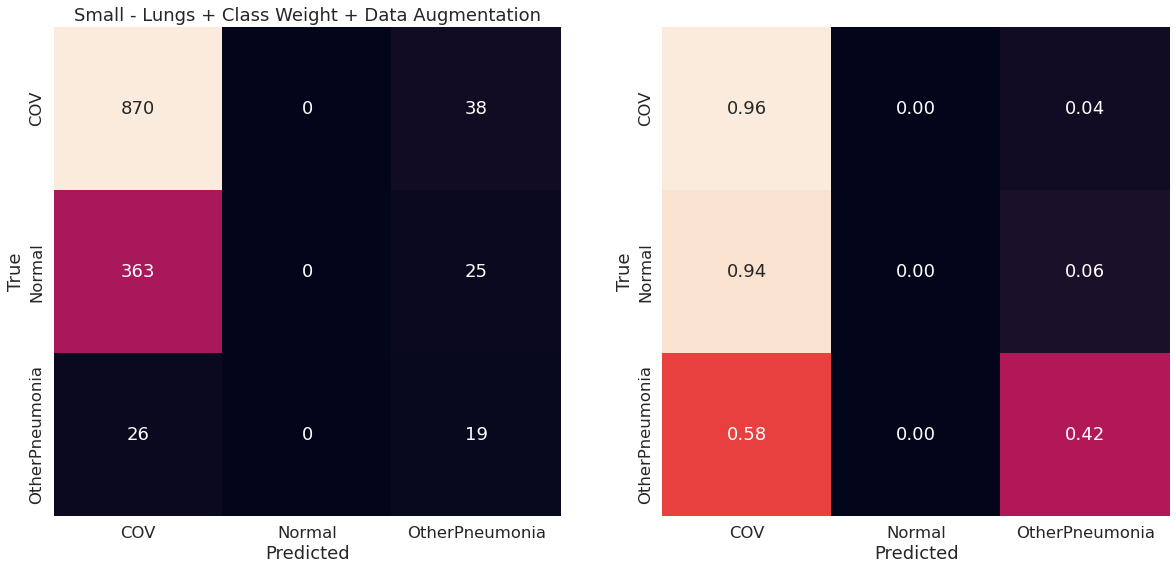

In [7]:
confusion_matrices('Small', get_model_small(**img_params), get_model_small(if_dataaug=True, data_augmentation=dataaug_layer(0.05, -0.1, 0.05, **img_params), **img_params), 'lungs', X_val, y_val, 'Lungs')

F1 SCORE:  0.75638103
                precision    recall  f1-score   support

           COV       0.88      0.82      0.85       908
        Normal       0.78      0.48      0.59       388
OtherPneumonia       0.17      0.91      0.28        45

      accuracy                           0.73      1341
     macro avg       0.61      0.74      0.58      1341
  weighted avg       0.82      0.73      0.76      1341



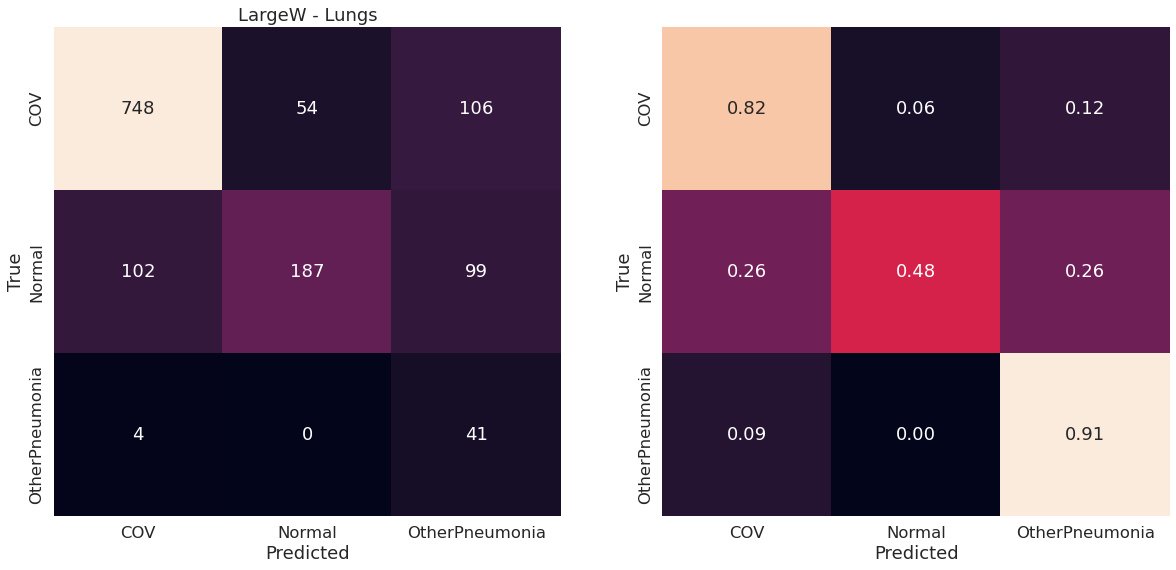

F1 SCORE:  0.64803505
                precision    recall  f1-score   support

           COV       0.91      0.63      0.74       908
        Normal       0.72      0.37      0.48       388
OtherPneumonia       0.07      0.84      0.13        45

      accuracy                           0.56      1341
     macro avg       0.57      0.61      0.45      1341
  weighted avg       0.83      0.56      0.65      1341



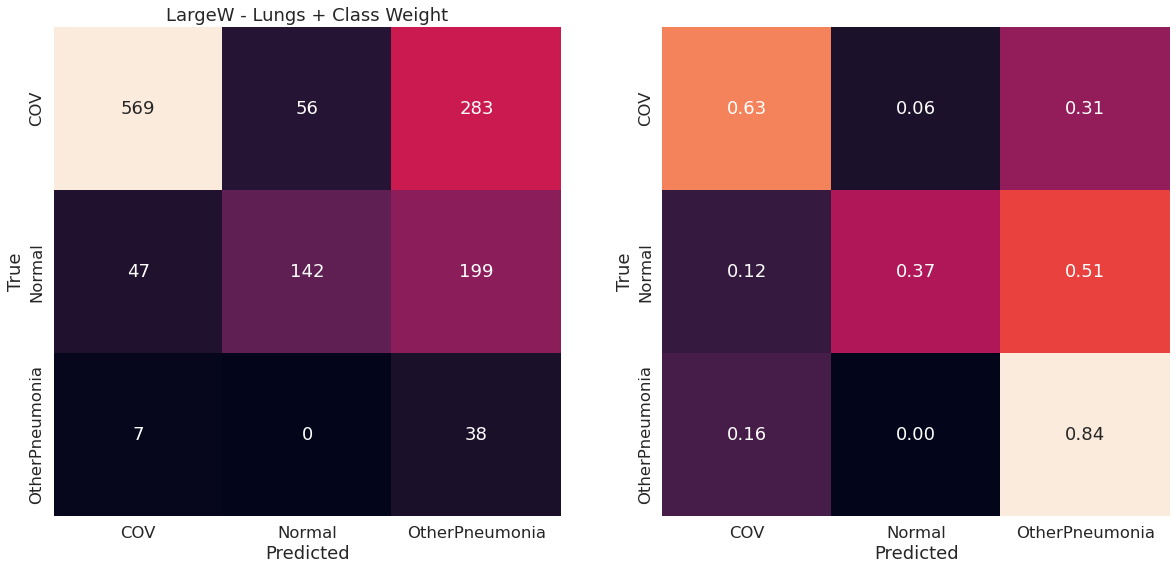

F1 SCORE:  0.63949656
                precision    recall  f1-score   support

           COV       0.75      0.79      0.77       908
        Normal       0.65      0.26      0.37       388
OtherPneumonia       0.19      1.00      0.32        45

      accuracy                           0.64      1341
     macro avg       0.53      0.68      0.49      1341
  weighted avg       0.70      0.64      0.64      1341



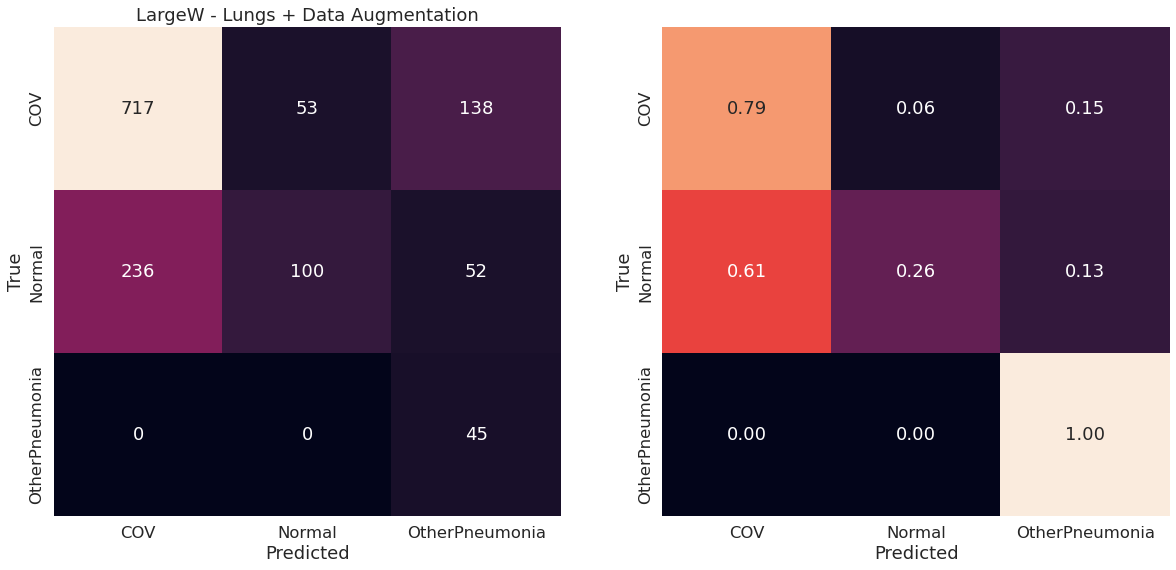

F1 SCORE:  0.5767172
                precision    recall  f1-score   support

           COV       0.81      0.52      0.64       908
        Normal       0.63      0.40      0.49       388
OtherPneumonia       0.07      0.82      0.14        45

      accuracy                           0.50      1341
     macro avg       0.50      0.58      0.42      1341
  weighted avg       0.73      0.50      0.58      1341



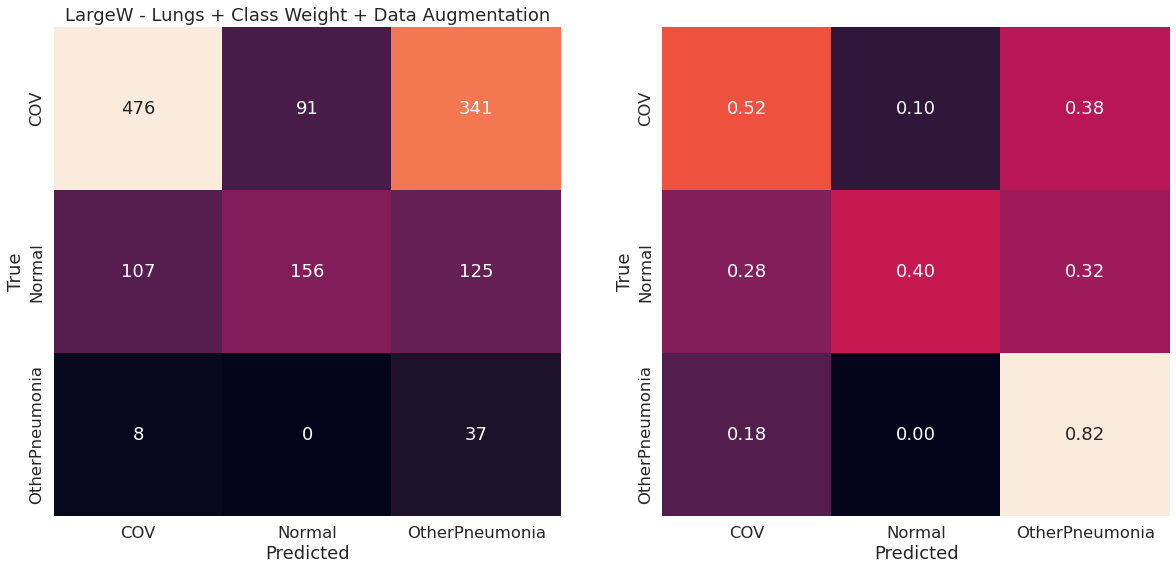

In [11]:
confusion_matrices('LargeW', get_model_largew(**img_params), get_model_largew(if_dataaug=True, data_augmentation=dataaug_layer(0.05, -0.1, 0.05, **img_params), **img_params), 'lungs', X_val, y_val, 'Lungs')

F1 SCORE:  0.7875289
                precision    recall  f1-score   support

           COV       0.87      0.84      0.85       908
        Normal       0.73      0.63      0.67       388
OtherPneumonia       0.34      0.96      0.50        45

      accuracy                           0.78      1341
     macro avg       0.64      0.81      0.67      1341
  weighted avg       0.81      0.78      0.79      1341



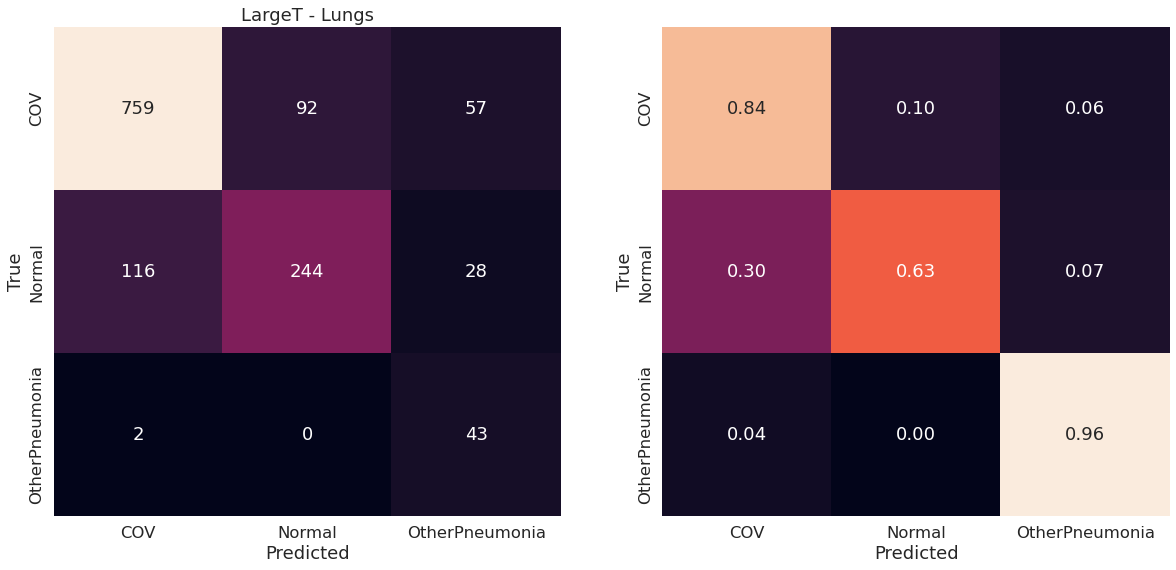

F1 SCORE:  0.7072909
                precision    recall  f1-score   support

           COV       0.79      0.77      0.78       908
        Normal       0.56      0.61      0.58       388
OtherPneumonia       0.32      0.27      0.29        45

      accuracy                           0.71      1341
     macro avg       0.56      0.55      0.55      1341
  weighted avg       0.71      0.71      0.71      1341



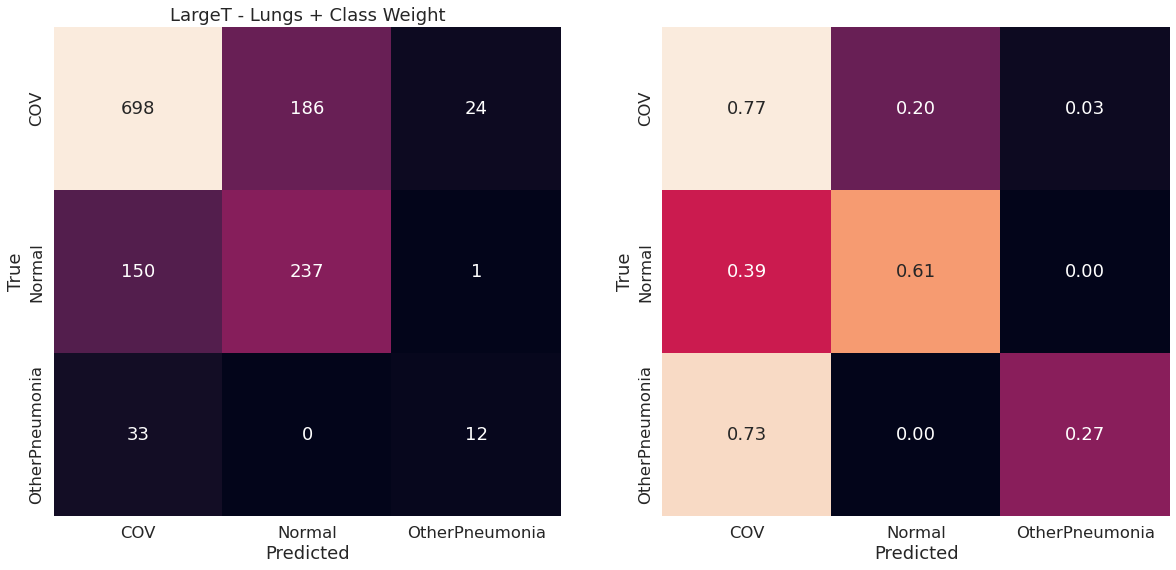

F1 SCORE:  0.6305684
                precision    recall  f1-score   support

           COV       0.90      0.55      0.68       908
        Normal       0.55      0.57      0.56       388
OtherPneumonia       0.12      1.00      0.21        45

      accuracy                           0.57      1341
     macro avg       0.52      0.71      0.48      1341
  weighted avg       0.77      0.57      0.63      1341



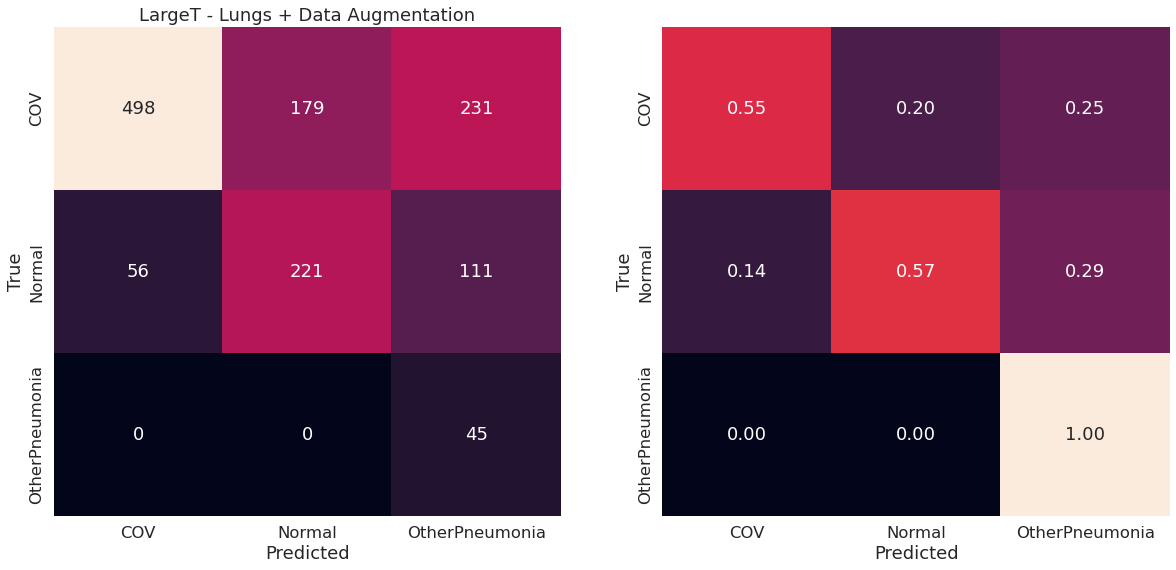

F1 SCORE:  0.5818717
                precision    recall  f1-score   support

           COV       0.69      0.80      0.74       908
        Normal       0.38      0.19      0.26       388
OtherPneumonia       0.15      0.31      0.20        45

      accuracy                           0.61      1341
     macro avg       0.41      0.43      0.40      1341
  weighted avg       0.58      0.61      0.58      1341



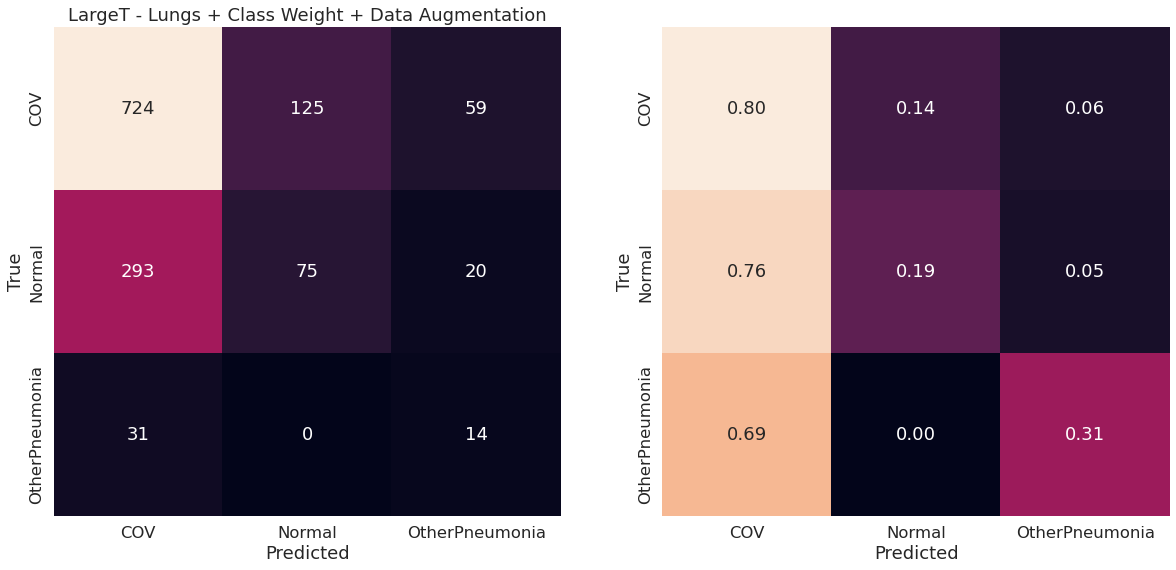

In [9]:
confusion_matrices('LargeT', get_model_larget(**img_params), get_model_larget(if_dataaug=True, data_augmentation=dataaug_layer(0.05, -0.1, 0.05, **img_params), **img_params), 'lungs', X_val, y_val, 'Lungs')

#### RGB Images

In [4]:
img_params = {'img_width': 330,
              'img_height': 256,
              'num_channels': 3}

try:
    X_val_rgb = np.load('CT-COV-Lungs-Crop/Val/X_val_rgb.npy')
    y_val_rgb = np.load('CT-COV-Lungs-Crop/Val/y_val_rgb.npy')

except:
    files_paths_val, files_labels_val = files_paths_labels('CT-COV-Lungs-Crop/Val', 'Val')
    X_val_rgb, y_val_rgb = prepare_X_y(files_paths_val, files_labels_val, **img_params)
    X_val_rgb, y_val_rgb = preprocess_matrices(X_val_rgb, y_val_rgb)

    np.save('CT-COV-Lungs-Crop/Val/X_val_rgb.npy', X_val_rgb)
    np.save('CT-COV-Lungs-Crop/Val/y_val_rgb.npy', y_val_rgb)

F1 SCORE:  0.72735935
                precision    recall  f1-score   support

           COV       0.78      0.91      0.84       908
        Normal       0.75      0.36      0.49       388
OtherPneumonia       0.41      0.82      0.54        45

      accuracy                           0.75      1341
     macro avg       0.64      0.70      0.62      1341
  weighted avg       0.76      0.75      0.73      1341



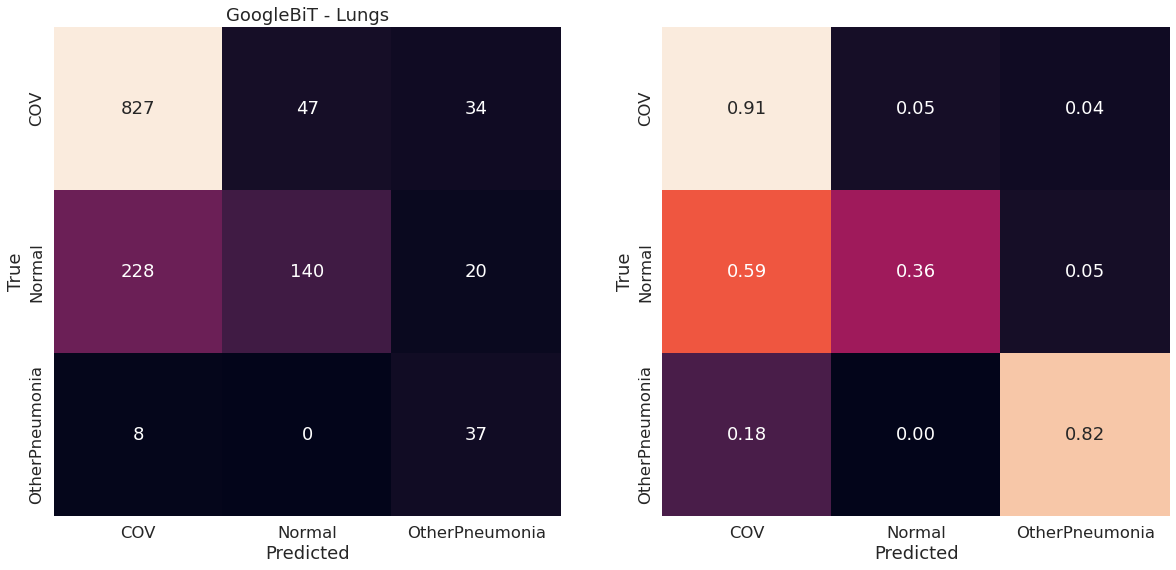

F1 SCORE:  0.74144465
                precision    recall  f1-score   support

           COV       0.82      0.82      0.82       908
        Normal       0.66      0.53      0.59       388
OtherPneumonia       0.32      0.89      0.47        45

      accuracy                           0.74      1341
     macro avg       0.60      0.75      0.63      1341
  weighted avg       0.76      0.74      0.74      1341



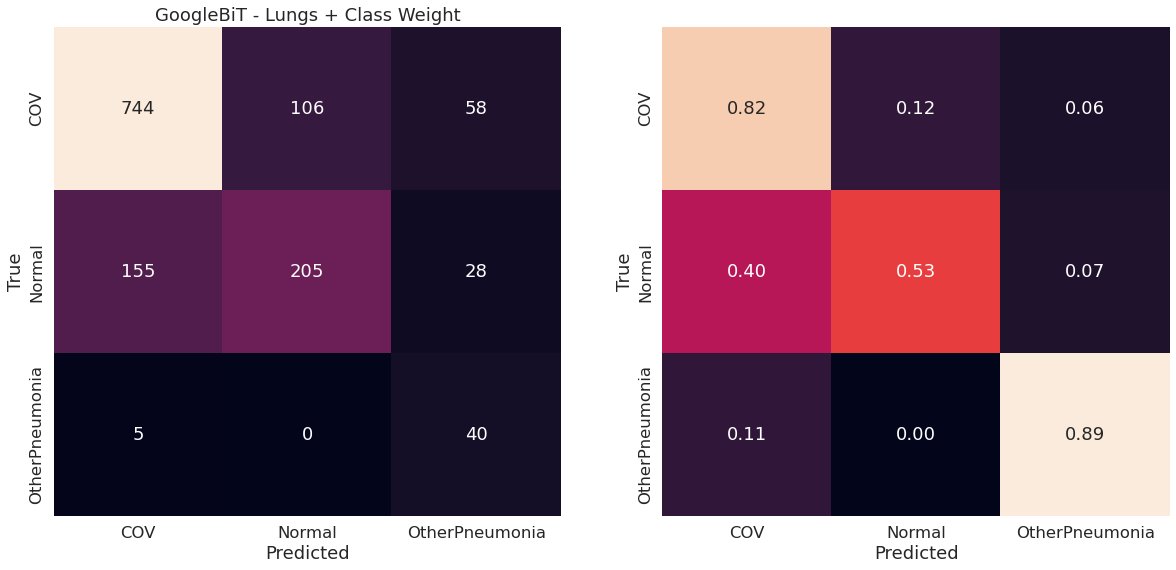

F1 SCORE:  0.74155486
                precision    recall  f1-score   support

           COV       0.85      0.76      0.80       908
        Normal       0.59      0.66      0.62       388
OtherPneumonia       0.39      0.78      0.52        45

      accuracy                           0.73      1341
     macro avg       0.61      0.73      0.65      1341
  weighted avg       0.76      0.73      0.74      1341



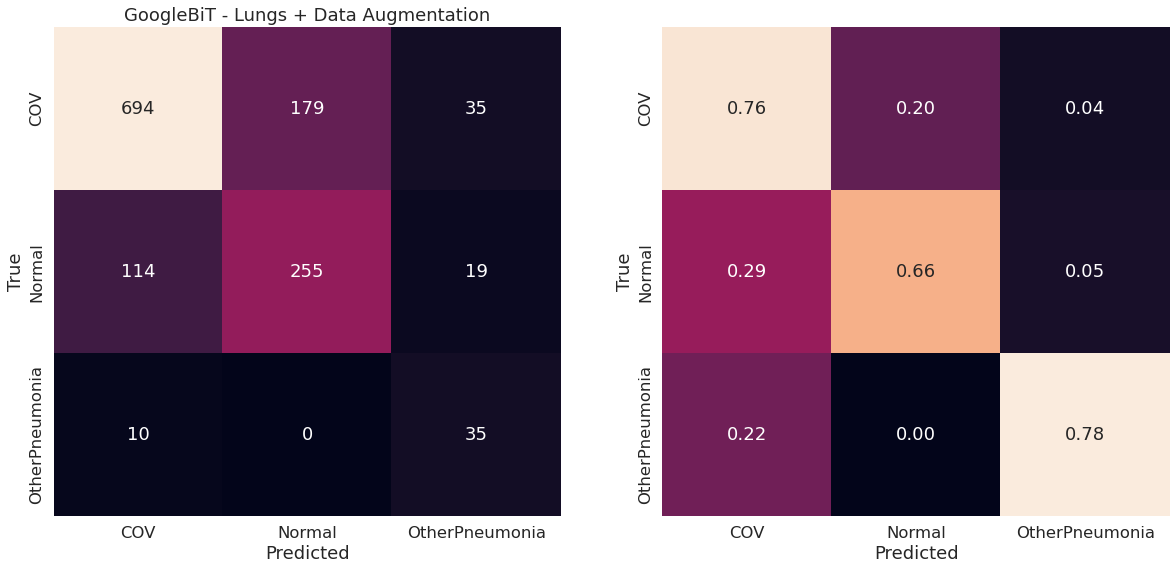

F1 SCORE:  0.742658
                precision    recall  f1-score   support

           COV       0.85      0.75      0.80       908
        Normal       0.57      0.71      0.63       388
OtherPneumonia       0.48      0.67      0.56        45

      accuracy                           0.74      1341
     macro avg       0.63      0.71      0.66      1341
  weighted avg       0.76      0.74      0.74      1341



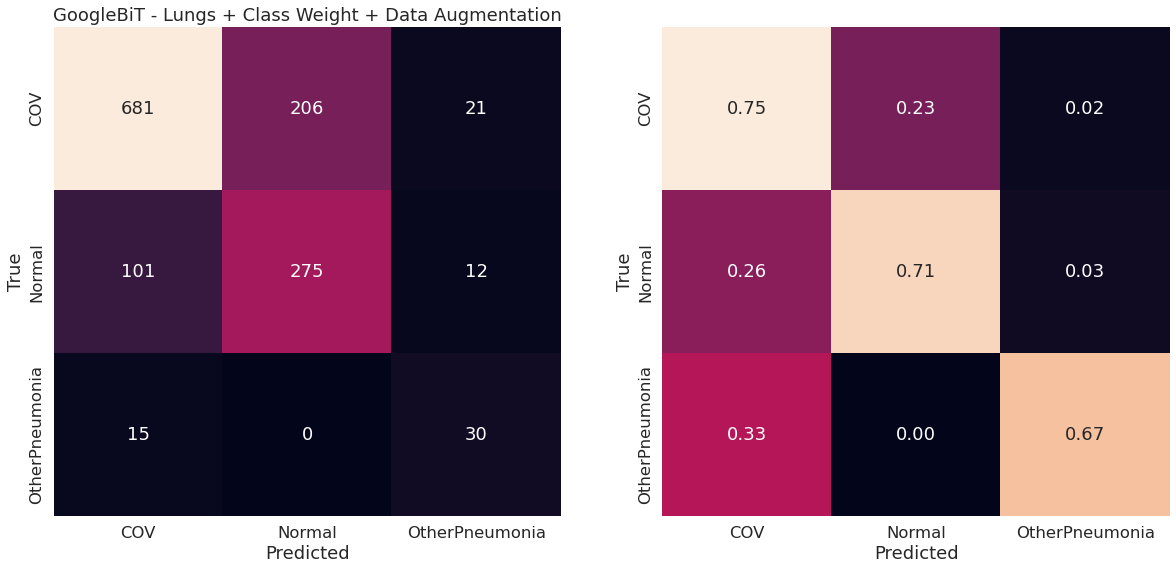

In [15]:
confusion_matrices('GoogleBiT', get_model_bit(), get_model_bit(), 'lungs', X_val_rgb/np.max(X_val_rgb), y_val_rgb, 'Lungs')

F1 SCORE:  0.7685328
                precision    recall  f1-score   support

           COV       0.83      0.85      0.84       908
        Normal       0.65      0.60      0.62       388
OtherPneumonia       0.59      0.76      0.66        45

      accuracy                           0.77      1341
     macro avg       0.69      0.73      0.71      1341
  weighted avg       0.77      0.77      0.77      1341



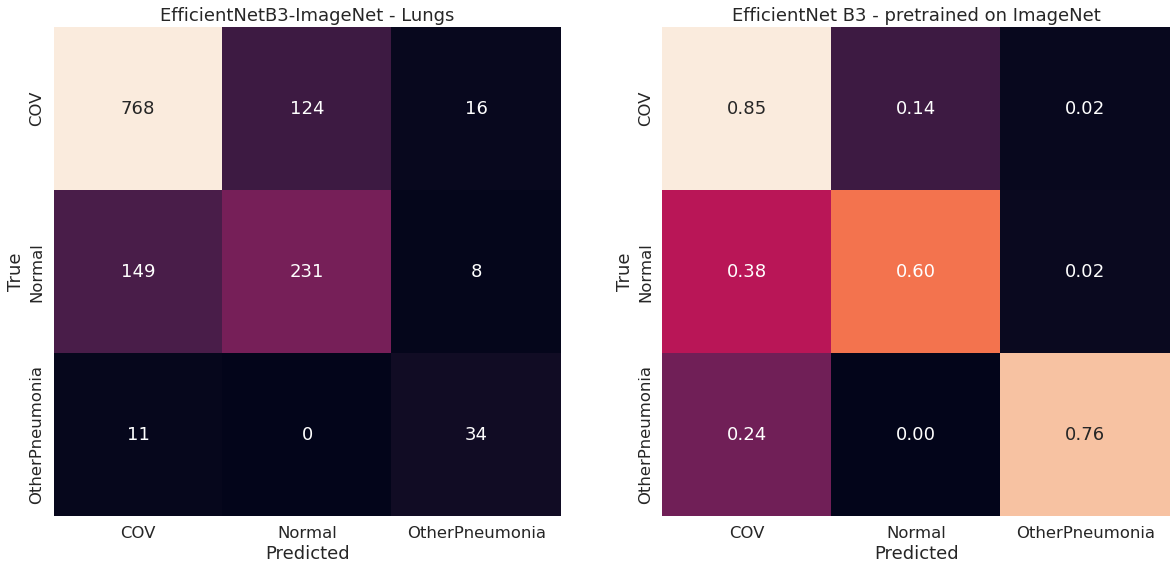

F1 SCORE:  0.7444047
                precision    recall  f1-score   support

           COV       0.85      0.78      0.81       908
        Normal       0.59      0.63      0.61       388
OtherPneumonia       0.42      0.87      0.57        45

      accuracy                           0.74      1341
     macro avg       0.62      0.76      0.66      1341
  weighted avg       0.76      0.74      0.74      1341



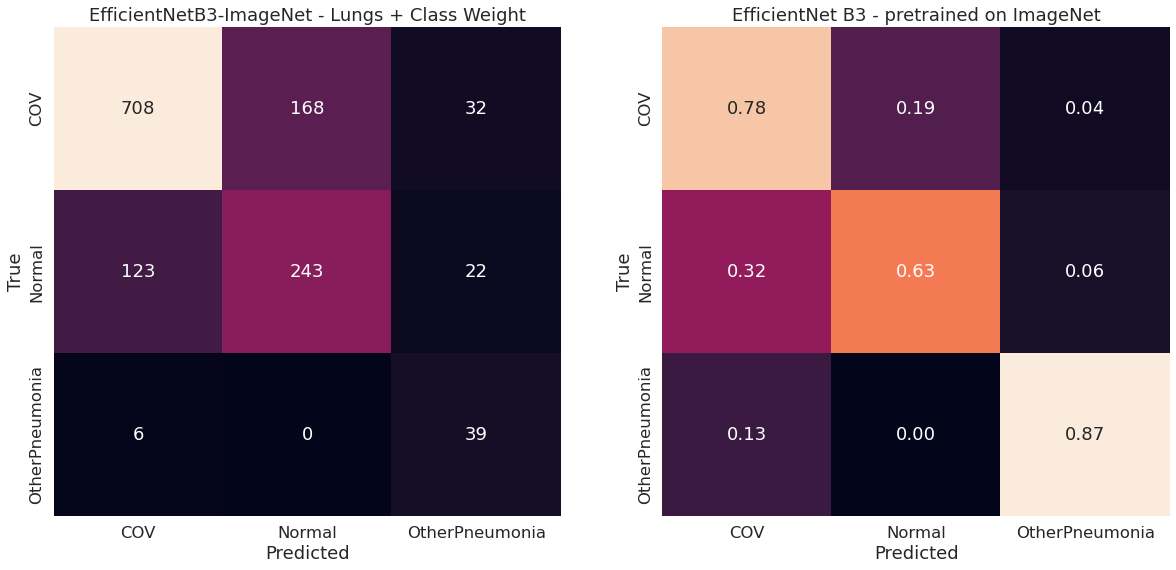

F1 SCORE:  0.63585454
                precision    recall  f1-score   support

           COV       0.85      0.55      0.66       908
        Normal       0.44      0.81      0.57       388
OtherPneumonia       0.75      0.53      0.62        45

      accuracy                           0.62      1341
     macro avg       0.68      0.63      0.62      1341
  weighted avg       0.73      0.62      0.64      1341



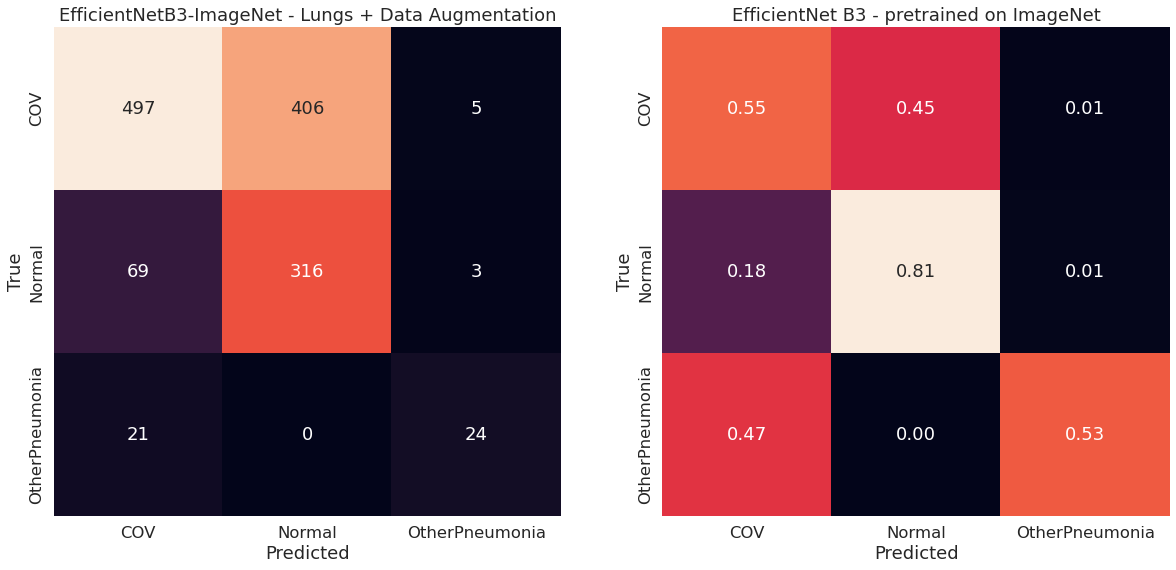

F1 SCORE:  0.63187253
                precision    recall  f1-score   support

           COV       0.87      0.52      0.65       908
        Normal       0.43      0.83      0.57       388
OtherPneumonia       0.65      0.82      0.73        45

      accuracy                           0.62      1341
     macro avg       0.65      0.72      0.65      1341
  weighted avg       0.74      0.62      0.63      1341



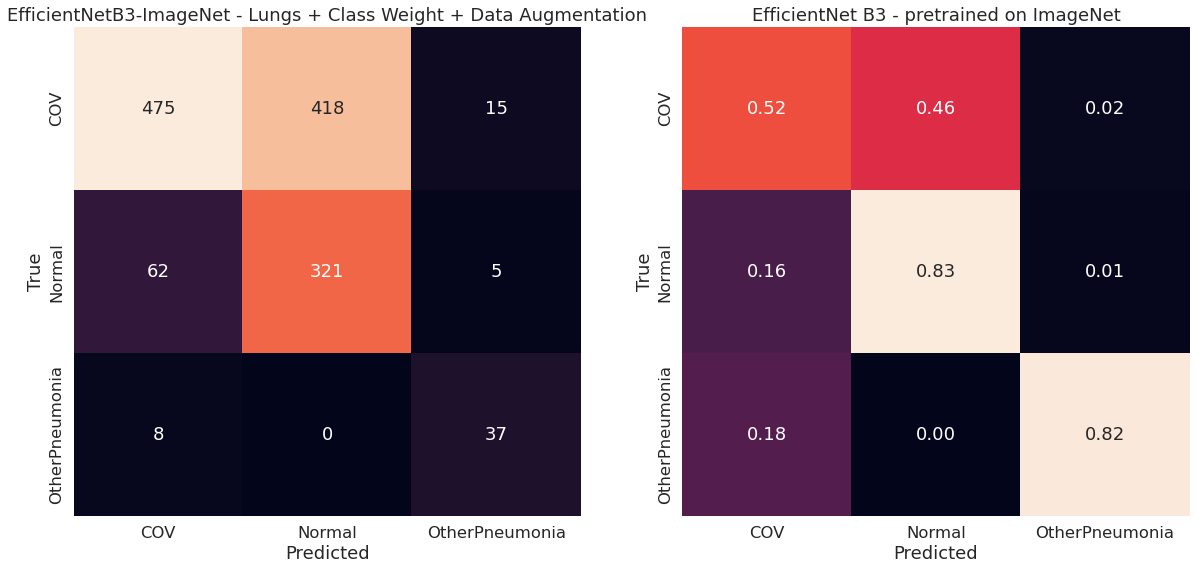

In [5]:
confusion_matrices('EfficientNetB3-ImageNet', get_efficientnet_b3(**img_params), get_efficientnet_b3(if_dataaug=True, data_augmentation=dataaug_layer(0.05, -0.1, 0.05, **img_params), **img_params), 'lungs', X_val_rgb, y_val_rgb, 'Lungs', 'EfficientNet B3 - pretrained on ImageNet')

F1 SCORE:  0.62774324
                precision    recall  f1-score   support

           COV       0.75      0.67      0.71       908
        Normal       0.44      0.58      0.50       388
OtherPneumonia       0.14      0.07      0.09        45

      accuracy                           0.62      1341
     macro avg       0.45      0.44      0.43      1341
  weighted avg       0.64      0.62      0.63      1341



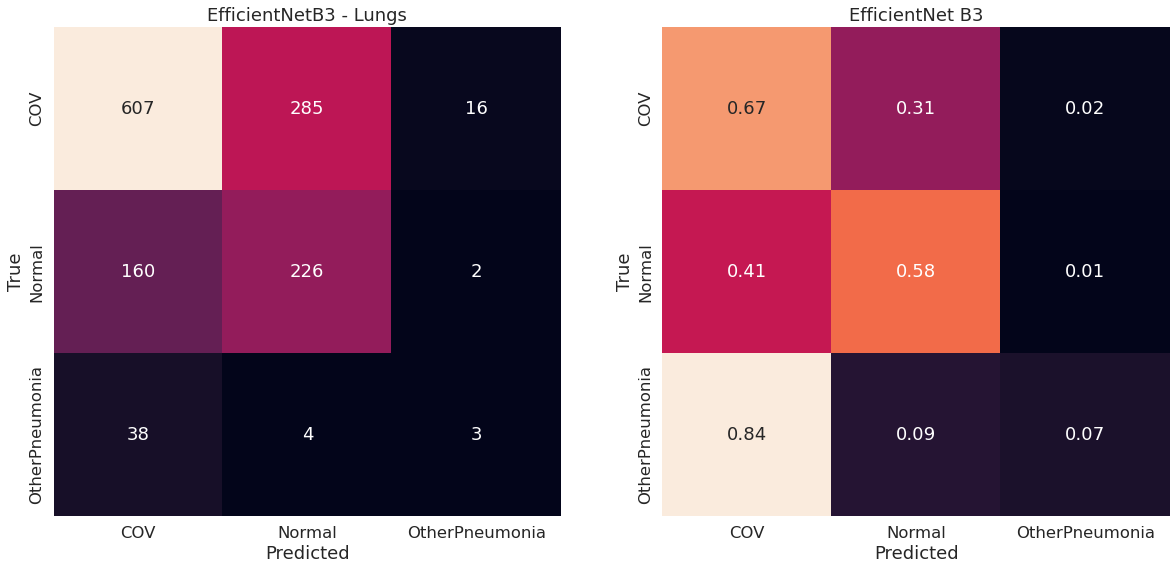

F1 SCORE:  0.67370003
                precision    recall  f1-score   support

           COV       0.78      0.78      0.78       908
        Normal       0.59      0.39      0.47       388
OtherPneumonia       0.14      0.56      0.22        45

      accuracy                           0.66      1341
     macro avg       0.50      0.58      0.49      1341
  weighted avg       0.71      0.66      0.67      1341



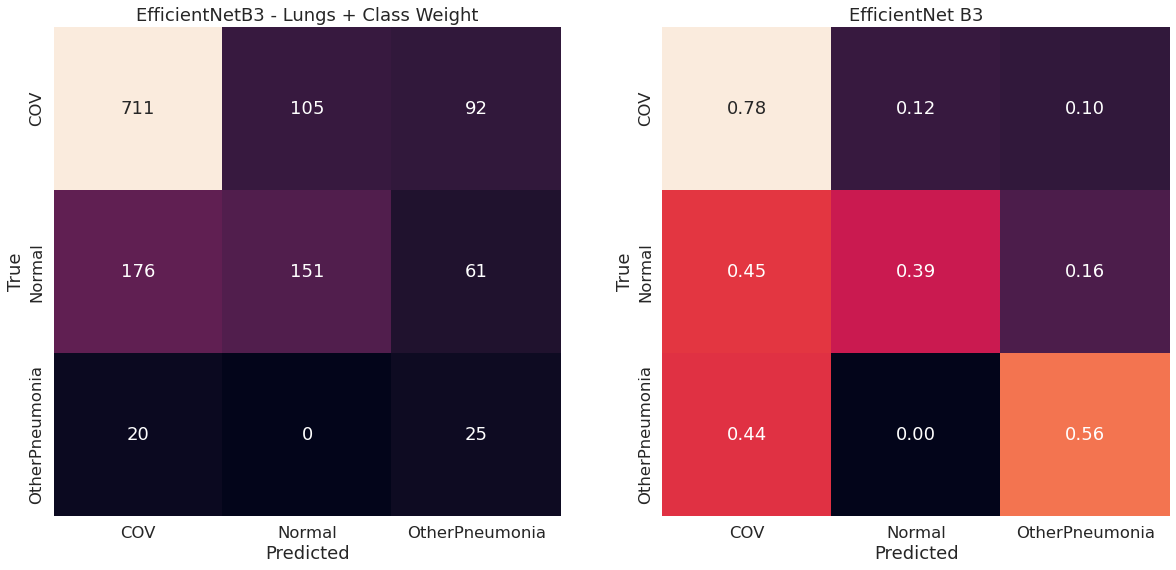

F1 SCORE:  0.6790986
                precision    recall  f1-score   support

           COV       0.73      0.94      0.82       908
        Normal       0.68      0.31      0.42       388
OtherPneumonia       0.00      0.00      0.00        45

      accuracy                           0.72      1341
     macro avg       0.47      0.42      0.42      1341
  weighted avg       0.69      0.72      0.68      1341



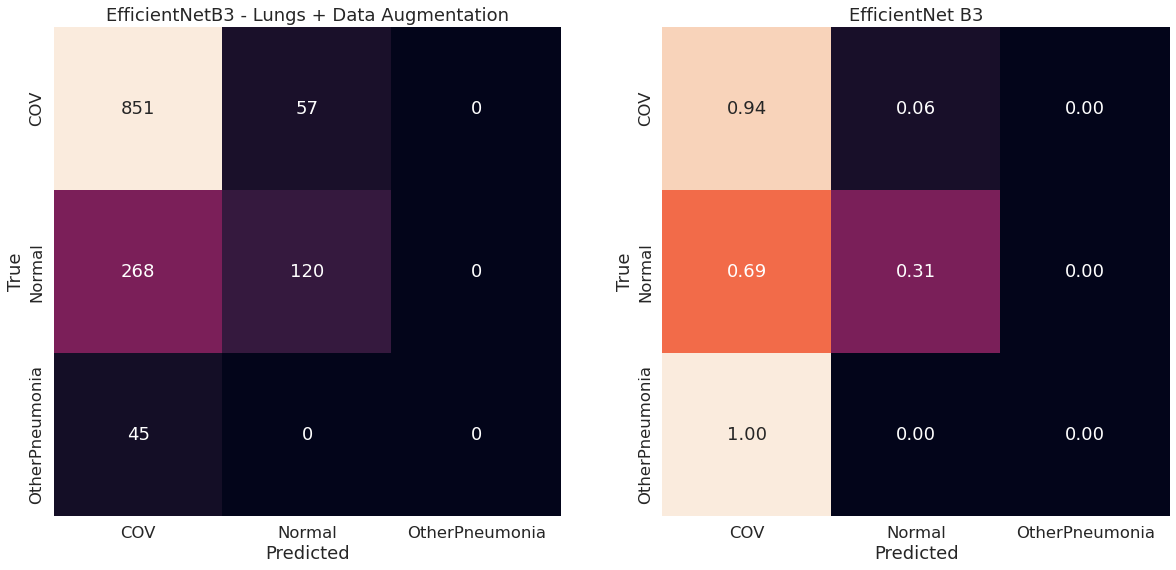

F1 SCORE:  0.61439866
                precision    recall  f1-score   support

           COV       0.79      0.59      0.67       908
        Normal       0.52      0.55      0.54       388
OtherPneumonia       0.04      0.22      0.07        45

      accuracy                           0.57      1341
     macro avg       0.45      0.45      0.43      1341
  weighted avg       0.69      0.57      0.61      1341



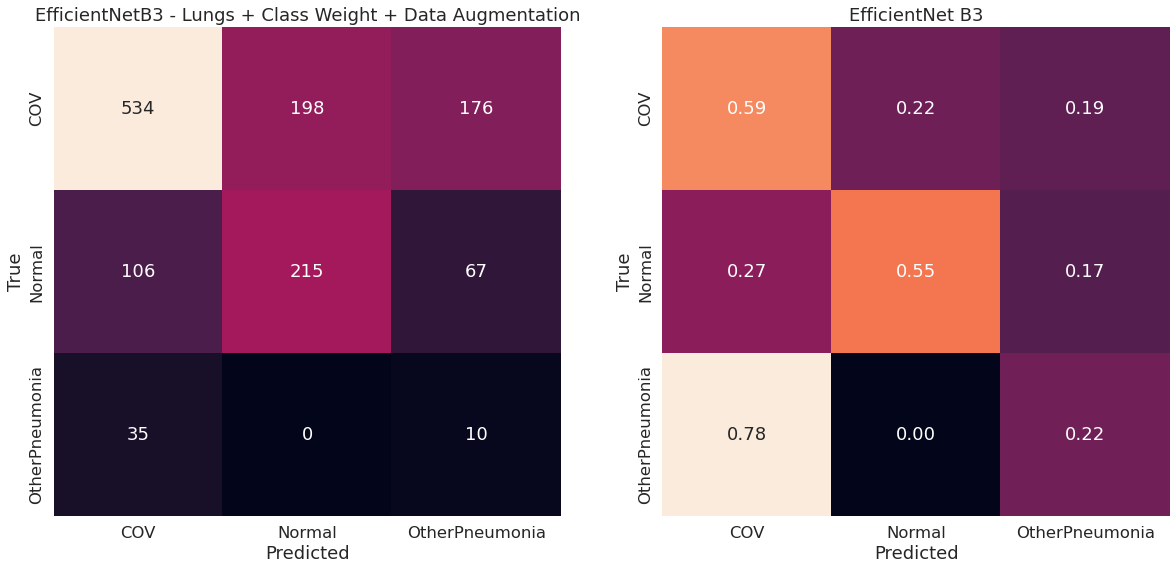

In [5]:
confusion_matrices('EfficientNetB3', load_efficientnet(**img_params), load_efficientnet(if_dataaug=True, data_augmentation=dataaug_layer(0.05, -0.1, 0.05, **img_params), **img_params), 'lungs', X_val_rgb, y_val_rgb, 'Lungs', 'EfficientNet B3')

## Lungs - No Crop

#### Grayscale Images

In [ ]:
img_params = {'img_width': 512,
              'img_height': 512,
              'num_channels': 1}

try:
    X_val = np.load('CT-COV-Lungs/Val/X_val.npy')
    y_val = np.load('CT-COV-Lungs/Val/y_val.npy')

except:
    files_paths_val, files_labels_val = files_paths_labels('CT-COV-Lungs/Val', 'Val')
    X_val, y_val = prepare_X_y(files_paths_val, files_labels_val, **img_params)
    X_val, y_val = preprocess_matrices(X_val, y_val)

    np.save('CT-COV-Lungs/Val/X_val.npy', X_val)
    np.save('CT-COV-Lungs/Val/y_val.npy', y_val)

In [ ]:
confusion_matrices('Simple', get_model_simple(**img_params), get_model_simple(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.15, **img_params), **img_params), 'lungs-nocrop', X_val, y_val, 'Lungs - No Crop')

In [ ]:
confusion_matrices('Tiny', get_model_tiny(**img_params), get_model_tiny(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.15, **img_params), **img_params), 'lungs-nocrop', X_val, y_val, 'Lungs - No Crop')

In [ ]:
confusion_matrices('Small', get_model_small(**img_params), get_model_small(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.15, **img_params), **img_params), 'lungs-nocrop', X_val, y_val, 'Lungs - No Crop')

In [ ]:
confusion_matrices('LargeW', get_model_largew(**img_params), get_model_largew(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.15, **img_params), **img_params), 'lungs-nocrop', X_val, y_val, 'Lungs - No Crop')

In [ ]:
confusion_matrices('LargeT', get_model_larget(**img_params), get_model_larget(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.15, **img_params), **img_params), 'lungs-nocrop', X_val, y_val, 'Lungs - No Crop')

#### RGB Images

In [ ]:
img_params = {'img_width': 512,
              'img_height': 512,
              'num_channels': 3}

try:
    X_val_rgb = np.load('CT-COV-Lungs/Val/X_val_rgb.npy')
    y_val_rgb = np.load('CT-COV-Lungs/Val/y_val_rgb.npy')

except:
    files_paths_val, files_labels_val = files_paths_labels('CT-COV-Lungs/Val', 'Val')
    X_val_rgb, y_val_rgb = prepare_X_y(files_paths_val, files_labels_val, **img_params)
    X_val_rgb, y_val_rgb = preprocess_matrices(X_val_rgb, y_val_rgb)

    np.save('CT-COV-Lungs/Val/X_val_rgb.npy', X_val_rgb)
    np.save('CT-COV-Lungs/Val/y_val_rgb.npy', y_val_rgb)

In [ ]:
confusion_matrices('GoogleBiT', get_model_bit(), get_model_bit(), 'lungs-nocrop', X_val_rgb/np.max(X_val_rgb), y_val_rgb, 'Lungs - No Crop')

In [ ]:
confusion_matrices('EfficientNetB3-ImageNet', get_efficientnet_b3(**img_params), get_efficientnet_b3(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.15, **img_params), **img_params), 'lungs-nocrop', X_val_rgb, y_val_rgb, 'Lungs - No Crop', 'EfficientNet B3 - pretrained on ImageNet')

In [ ]:
confusion_matrices('EfficientNetB3', load_efficientnet(**img_params), load_efficientnet(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.15, **img_params), **img_params), 'lungs-nocrop', X_val_rgb, y_val_rgb, 'Lungs - No Crop', 'EfficientNet B3')

## Crop

#### Grayscale Images

In [ ]:
img_params = {'img_width': 512,
              'img_height': 328,
              'num_channels': 1}

try:
    X_val = np.load('CT-COV-Crop/Val/X_val.npy')
    y_val = np.load('CT-COV-Crop/Val/y_val.npy')

except:
    files_paths_val, files_labels_val = files_paths_labels('CT-COV-Crop/Val', 'Val')
    X_val, y_val = prepare_X_y(files_paths_val, files_labels_val, **img_params)
    X_val, y_val = preprocess_matrices(X_val, y_val)

    np.save('CT-COV-Crop/Val/X_val.npy', X_val)
    np.save('CT-COV-Crop/Val/y_val.npy', y_val)

In [ ]:
confusion_matrices('Simple', get_model_simple(**img_params), get_model_simple(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, **img_params), **img_params), 'crop', X_val, y_val, 'Crop')

In [ ]:
confusion_matrices('Tiny', get_model_tiny(**img_params), get_model_tiny(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, **img_params), **img_params), 'crop', X_val, y_val, 'Crop')

In [ ]:
confusion_matrices('Small', get_model_small(**img_params), get_model_small(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, **img_params), **img_params), 'crop', X_val, y_val, 'Crop')

In [ ]:
confusion_matrices('LargeW', get_model_largew(**img_params), get_model_largew(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, **img_params), **img_params), 'crop', X_val, y_val, 'Crop')

In [ ]:
confusion_matrices('LargeT', get_model_larget(**img_params), get_model_larget(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, **img_params), **img_params), 'crop', X_val, y_val, 'Crop')

#### RGB Images

In [ ]:
img_params = {'img_width': 512,
              'img_height': 328,
              'num_channels': 3}

try:
    X_val_rgb = np.load('CT-COV-Crop/Val/X_val_rgb.npy')
    y_val_rgb = np.load('CT-COV-Crop/Val/y_val_rgb.npy')

except:
    files_paths_val, files_labels_val = files_paths_labels('CT-COV-Crop/Val', 'Val')
    X_val_rgb, y_val_rgb = prepare_X_y(files_paths_val, files_labels_val, **img_params)
    X_val_rgb, y_val_rgb = preprocess_matrices(X_val_rgb, y_val_rgb)

    np.save('CT-COV-Crop/Val/X_val_rgb.npy', X_val_rgb)
    np.save('CT-COV-Crop/Val/y_val_rgb.npy', y_val_rgb)

In [ ]:
confusion_matrices('GoogleBiT', get_model_bit(), get_model_bit(), 'crop', X_val_rgb/np.max(X_val_rgb), y_val_rgb, 'Crop')

In [ ]:
confusion_matrices('EfficientNetB3-ImageNet', get_efficientnet_b3(**img_params), get_efficientnet_b3(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, **img_params), **img_params), 'crop', X_val_rgb, y_val_rgb, 'Crop', 'EfficientNet B3 - pretrained on ImageNet')

In [ ]:
confusion_matrices('EfficientNetB3', load_efficientnet(**img_params), load_efficientnet(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, **img_params), **img_params), 'crop', X_val_rgb, y_val_rgb, 'Crop', 'EfficientNet B3')

## No Background

#### Grayscale Images

In [ ]:
img_params = {'img_width': 512,
              'img_height': 512,
              'num_channels': 1}

try:
    X_val = np.load('CT-COV-Contour/Val/X_val.npy')
    y_val = np.load('CT-COV-Contour/Val/y_val.npy')

except:
    files_paths_val, files_labels_val = files_paths_labels('CT-COV-Contour/Val', 'Val')
    X_val, y_val = prepare_X_y(files_paths_val, files_labels_val, **img_params)
    X_val, y_val = preprocess_matrices(X_val, y_val)

    np.save('CT-COV-Contour/Val/X_val.npy', X_val)
    np.save('CT-COV-Contour/Val/y_val.npy', y_val)

In [ ]:
confusion_matrices('Simple', get_model_simple(**img_params), get_model_simple(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, **img_params), **img_params), 'nobackg', X_val, y_val, 'No Background', 'Simple Model')

In [ ]:
confusion_matrices('Tiny', get_model_tiny(**img_params), get_model_tiny(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, **img_params), **img_params), 'nobackg', X_val, y_val, 'No Background', 'Tiny Model')

In [ ]:
confusion_matrices('Small', get_model_small(**img_params), get_model_small(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, **img_params), **img_params), 'nobackg', X_val, y_val, 'No Background', 'Small Model')

In [ ]:
confusion_matrices('LargeW', get_model_largew(**img_params), get_model_largew(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, **img_params), **img_params), 'nobackg', X_val, y_val, 'No Background', 'LargeW Model')

In [ ]:
confusion_matrices('LargeT', get_model_larget(**img_params), get_model_larget(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, **img_params), **img_params), 'nobackg', X_val, y_val, 'No Background', 'LargeT Model')

#### RGB Images

In [ ]:
img_params = {'img_width': 512,
              'img_height': 512,
              'num_channels': 3}

try:
    X_val_rgb = np.load('CT-COV-Contour/Val/X_val_rgb.npy')
    y_val_rgb = np.load('CT-COV-Contour/Val/y_val_rgb.npy')

except:
    files_paths_val, files_labels_val = files_paths_labels('CT-COV-Contour/Val', 'Val')
    X_val_rgb, y_val_rgb = prepare_X_y(files_paths_val, files_labels_val, **img_params)
    X_val_rgb, y_val_rgb = preprocess_matrices(X_val_rgb, y_val_rgb)

    np.save('CT-COV-Contour/Val/X_val_rgb.npy', X_val_rgb)
    np.save('CT-COV-Contour/Val/y_val_rgb.npy', y_val_rgb)

In [ ]:
confusion_matrices('GoogleBiT', get_model_bit(), get_model_bit(), 'nobackg', X_val_rgb/np.max(X_val_rgb), y_val_rgb, 'No Background')

In [ ]:
confusion_matrices('EfficientNetB3-ImageNet', get_efficientnet_b3(**img_params), get_efficientnet_b3(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, **img_params), **img_params), 'nobackg', X_val_rgb, y_val_rgb, 'No Background', 'EfficientNet B3 - pretrained on ImageNet')

In [ ]:
confusion_matrices('EfficientNetB3', load_efficientnet(**img_params), load_efficientnet(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, **img_params), **img_params), 'nobackg', X_val_rgb, y_val_rgb, 'No Background', 'EfficientNet B3')

## Original Images

#### Grayscale Images

In [ ]:
img_params = {'img_width': 512,
              'img_height': 512,
              'num_channels': 1}

try:
    X_val = np.load('CT-COV19/Val/X_val.npy')
    y_val = np.load('CT-COV19/Val/y_val.npy')

except:
    files_paths_val, files_labels_val = files_paths_labels('CT-COV19/Val', 'Val')
    X_val, y_val = prepare_X_y(files_paths_val, files_labels_val, **img_params)
    X_val, y_val = preprocess_matrices(X_val, y_val)

    np.save('CT-COV19/Val/X_val.npy', X_val)
    np.save('CT-COV19/Val/y_val.npy', y_val)

In [ ]:
confusion_matrices('Simple', get_model_simple(**img_params), get_model_simple(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, **img_params), **img_params), 'first', X_val, y_val, 'Original', 'Simple Model')

In [ ]:
confusion_matrices('Tiny', get_model_tiny(**img_params), get_model_tiny(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, **img_params), **img_params), 'first', X_val, y_val, 'Original', 'Tiny Model')

In [ ]:
confusion_matrices('Small', get_model_small(**img_params), get_model_small(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, **img_params), **img_params), 'first', X_val, y_val, 'Original', 'Small Model')

In [ ]:
confusion_matrices('LargeW', get_model_largew(**img_params), get_model_largew(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, **img_params), **img_params), 'first', X_val, y_val, 'Original', 'LargeW Model')

In [ ]:
confusion_matrices('LargeT', get_model_larget(**img_params), get_model_larget(if_dataaug=True, data_augmentation=dataaug_layer(0.1, -0.2, 0.1, **img_params), **img_params), 'first', X_val, y_val, 'Original', 'LargeT Model')

#### RGB Images

In [ ]:
img_params = {'img_width': 512,
              'img_height': 512,
              'num_channels': 3}

try:
    X_val_rgb = np.load('Data/CT-COV19/Val/X_val_rgb.npy')
    y_val_rgb = np.load('Data/CT-COV19/Val/y_val_rgb.npy')

except:
    files_paths_val, files_labels_val = files_paths_labels('Data/CT-COV19/Val', 'Val')
    X_val_rgb, y_val_rgb = prepare_X_y(files_paths_val, files_labels_val, **img_params)
    X_val_rgb, y_val_rgb = preprocess_matrices(X_val_rgb, y_val_rgb)

    np.save('Data/CT-COV19/Val/X_val_rgb.npy', X_val_rgb)
    np.save('Data/CT-COV19/Val/y_val_rgb.npy', y_val_rgb)

In [ ]:
confusion_matrices('GoogleBiT', get_model_bit(), get_model_bit(), 'first', X_val_rgb/np.max(X_val_rgb), y_val_rgb, 'Original', 'ResNet-50')

In [ ]:
confusion_matrices('EfficientNetB3-ImageNet', get_efficientnet_b3(**img_params), get_efficientnet_b3(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, **img_params), **img_params), 'first', X_val_rgb, y_val_rgb, 'Original', 'EfficientNet B3 - ImageNet')

In [ ]:
confusion_matrices('EfficientNetB3', load_efficientnet(**img_params), load_efficientnet(if_dataaug=True, data_augmentation=dataaug_layer(0.07, -0.1, 0.07, **img_params), **img_params), 'first', X_val_rgb, y_val_rgb, 'Original', 'EfficientNet B3')

In [ ]:
model = get_efficientnet_b0(**img_params)
model.load_weights('best-models/' + 'efficientnetb0-imagenet' + '-weights/' + 'first' + '.ckpt')
show_both_matrices(model, 'EfficientNet B0 - ImageNet', X_val_rgb, y_val_rgb, '', 'Original', 'EfficientNet B0 - ImageNet')

In [ ]:
model = load_efficientnet(b=0, **img_params)
model.load_weights('best-models/' + 'efficientnetb0' + '-weights/' + 'first' + '.ckpt')
show_both_matrices(model, 'EfficientNet B0', X_val_rgb, y_val_rgb, '', 'Original', 'EfficientNet B0');

In [ ]:
model = get_efficientnet_b7(**img_params)
model.load_weights('best-models/' + 'efficientnetb7-imagenet' + '-weights/' + 'first' + '.ckpt')
show_both_matrices(model, 'EfficientNet B7 - ImageNet', X_val_rgb, y_val_rgb, '', 'Original', 'EfficientNet B7 - ImageNet');

In [ ]:
model = load_efficientnet(b=7, **img_params)
model.load_weights('best-models/' + 'efficientnetb7' + '-weights/' + 'first' + '.ckpt')
show_both_matrices(model, 'EfficientNet B7', X_val_rgb, y_val_rgb, '', 'Original', 'EfficientNet B7');